   id_patient  Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL  \
0        1001   69            5  28.39    130.1           77.0    5.4  130.4   
1        1002   32            1  26.49    116.5           72.0    4.5   87.4   
2        1003   89           13  25.34    101.0           82.0    4.9  112.5   
3        1004   78           13  29.91    146.0          104.0    5.7   50.7   
4        1005   38            8  24.56    103.2           74.0    4.7  102.5   

    HDL  poids  Triglycerides   sexe  WaistCircumference  HipCircumference  \
0  44.0     53           50.0  Homme                90.5             107.9   
1  54.2    110          129.9  Femme               113.3              81.4   
2  56.8     52          177.6  Femme                84.7             107.2   
3  39.1    115          117.0  Homme               108.9             110.0   
4  29.1    117          145.9  Femme                84.1              92.8   

    WHR  FamilyHistory  DietType  Hypertension  Me

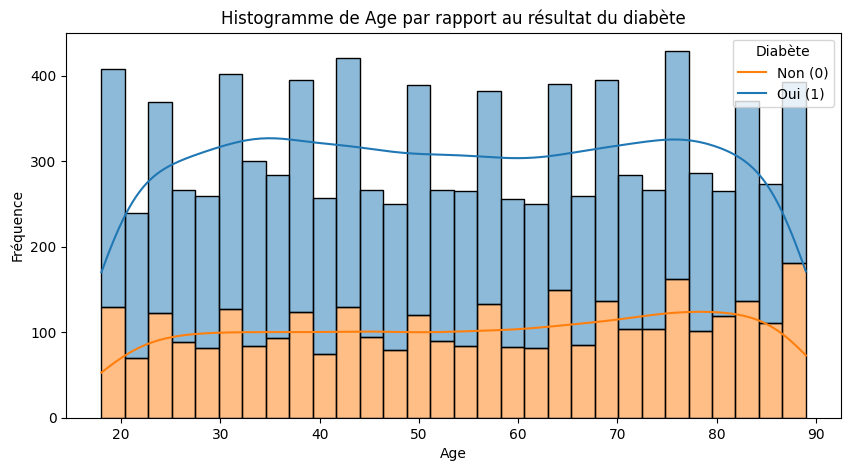

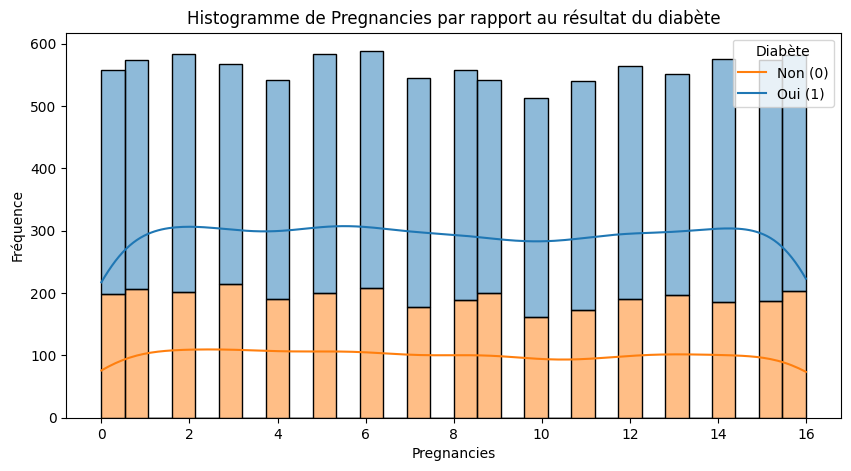

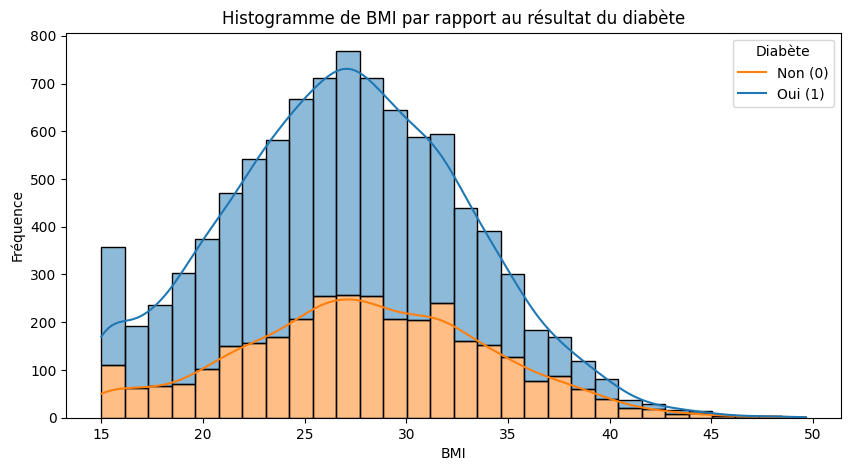

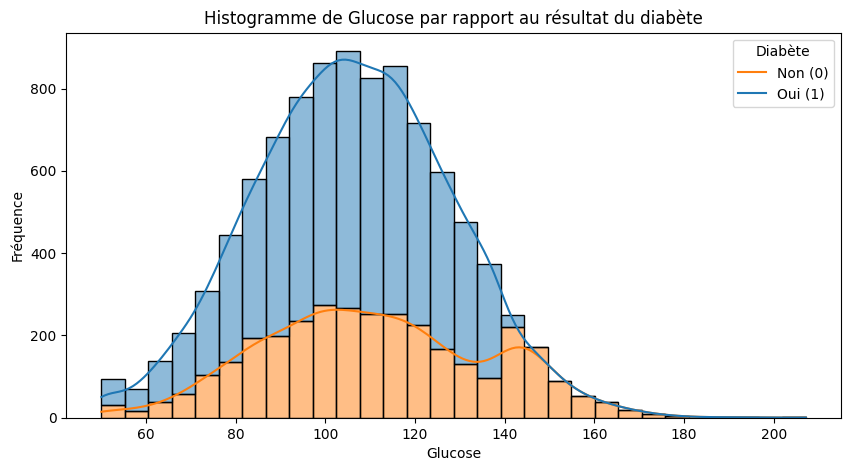

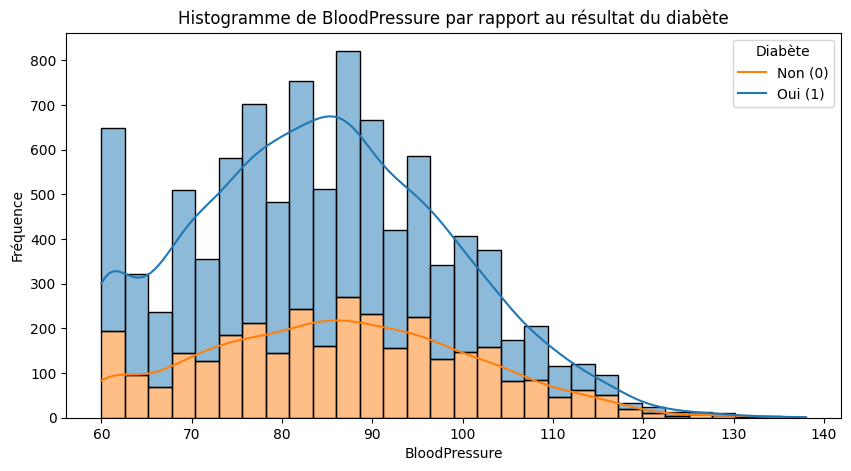

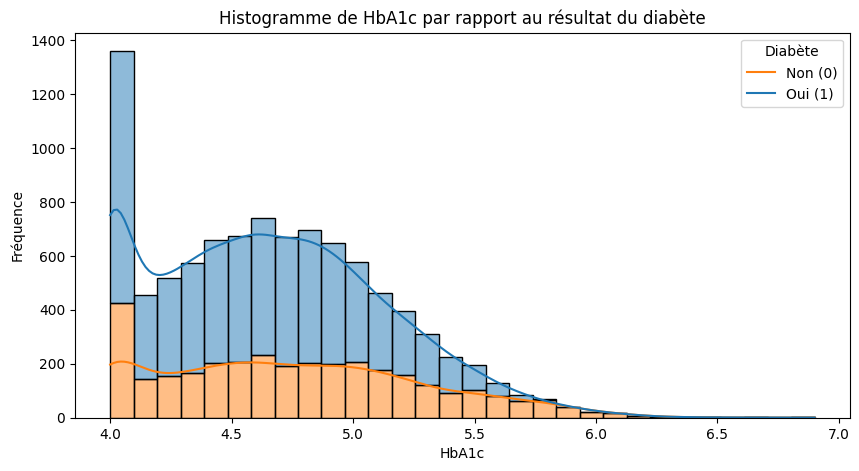

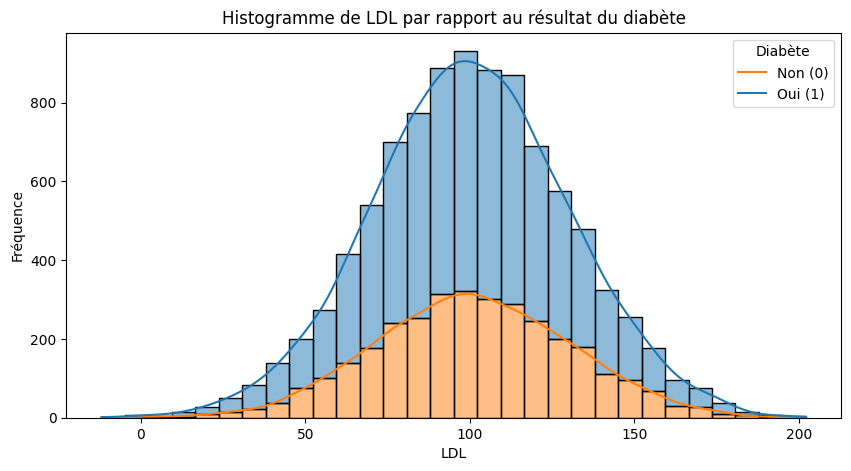

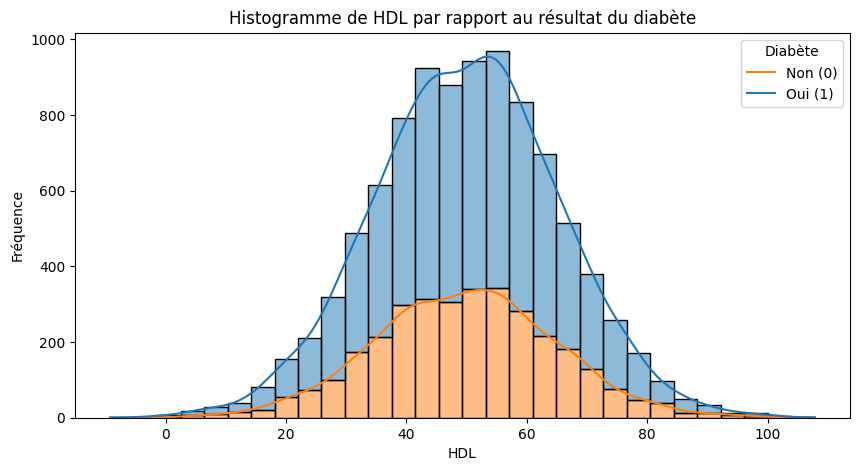

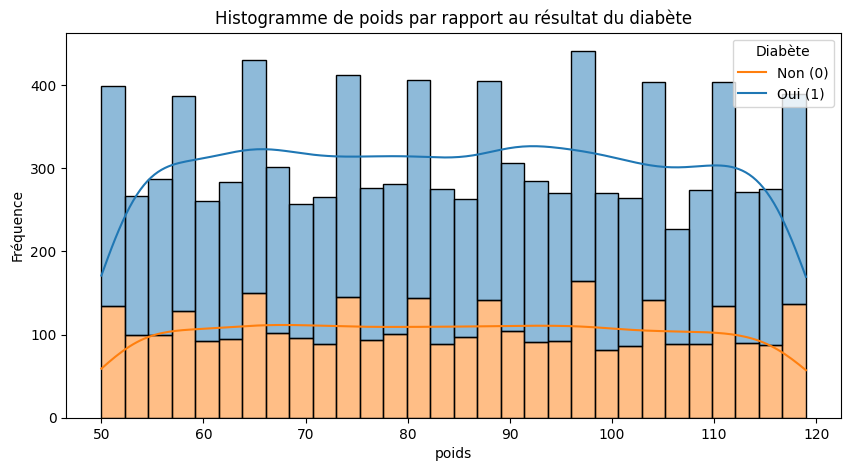

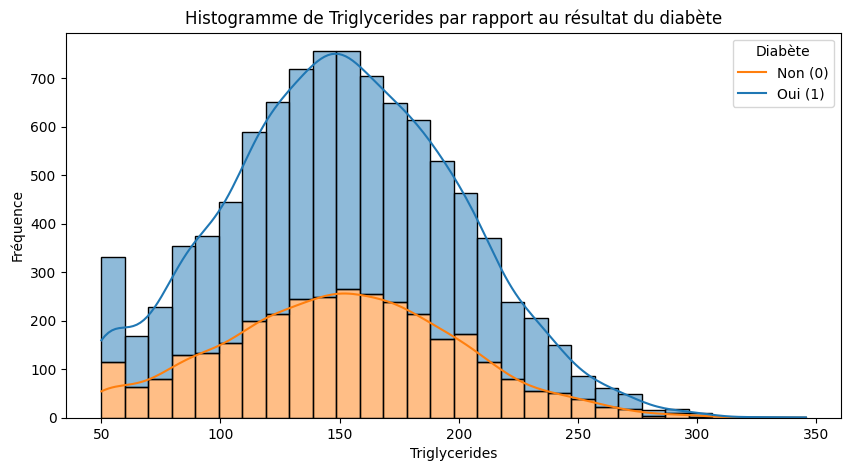

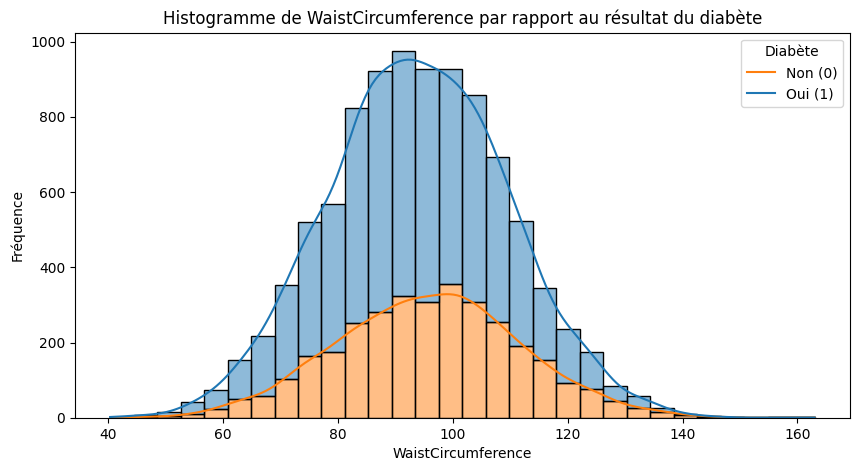

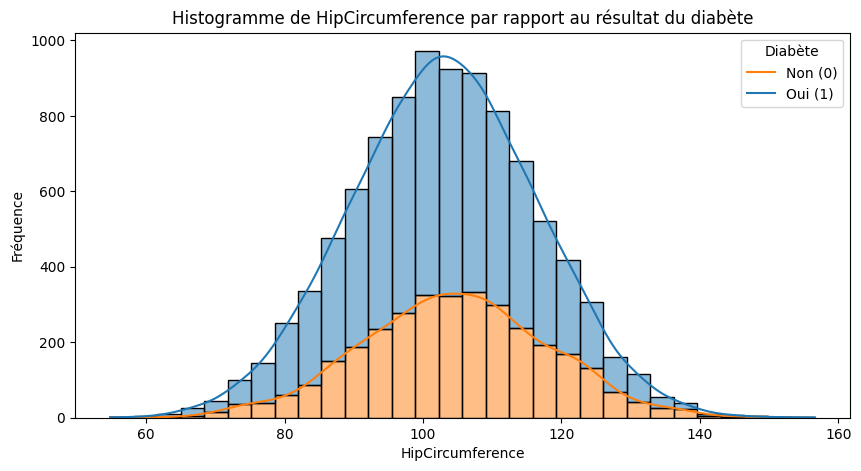

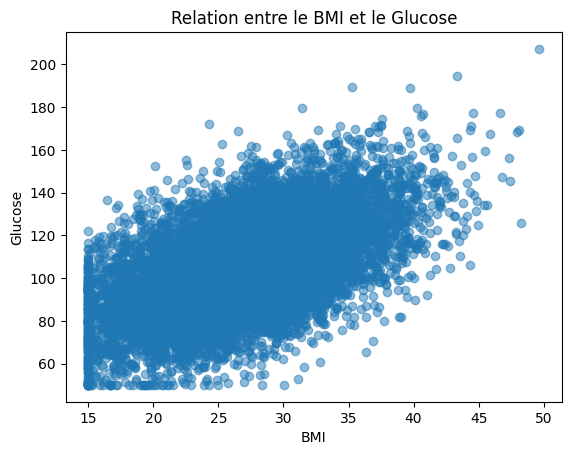

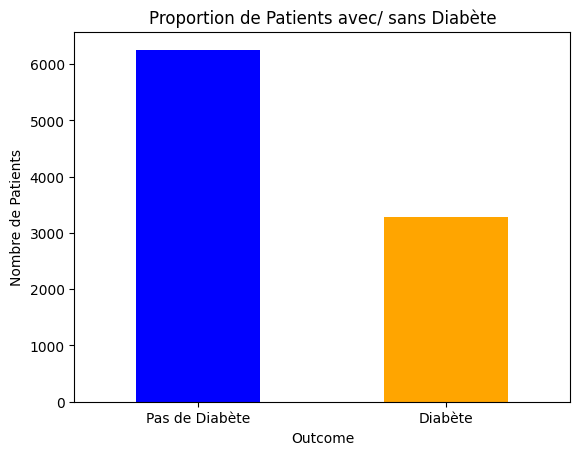

          id_patient          Age  Pregnancies          BMI      Glucose  \
count    9538.000000  9538.000000  9538.000000  9538.000000  9538.000000   
unique           NaN          NaN          NaN          NaN          NaN   
top              NaN          NaN          NaN          NaN          NaN   
freq             NaN          NaN          NaN          NaN          NaN   
mean     5769.500000    53.577584     7.986161    27.052364   106.104183   
std      2753.527768    20.764651     4.933469     5.927955    21.918590   
min      1001.000000    18.000000     0.000000    15.000000    50.000000   
25%      3385.250000    36.000000     4.000000    22.870000    91.000000   
50%      5769.500000    53.000000     8.000000    27.050000   106.000000   
75%      8153.750000    72.000000    12.000000    31.180000   121.000000   
max     10538.000000    89.000000    16.000000    49.660000   207.200000   

        BloodPressure        HbA1c          LDL          HDL        poids  \
count     

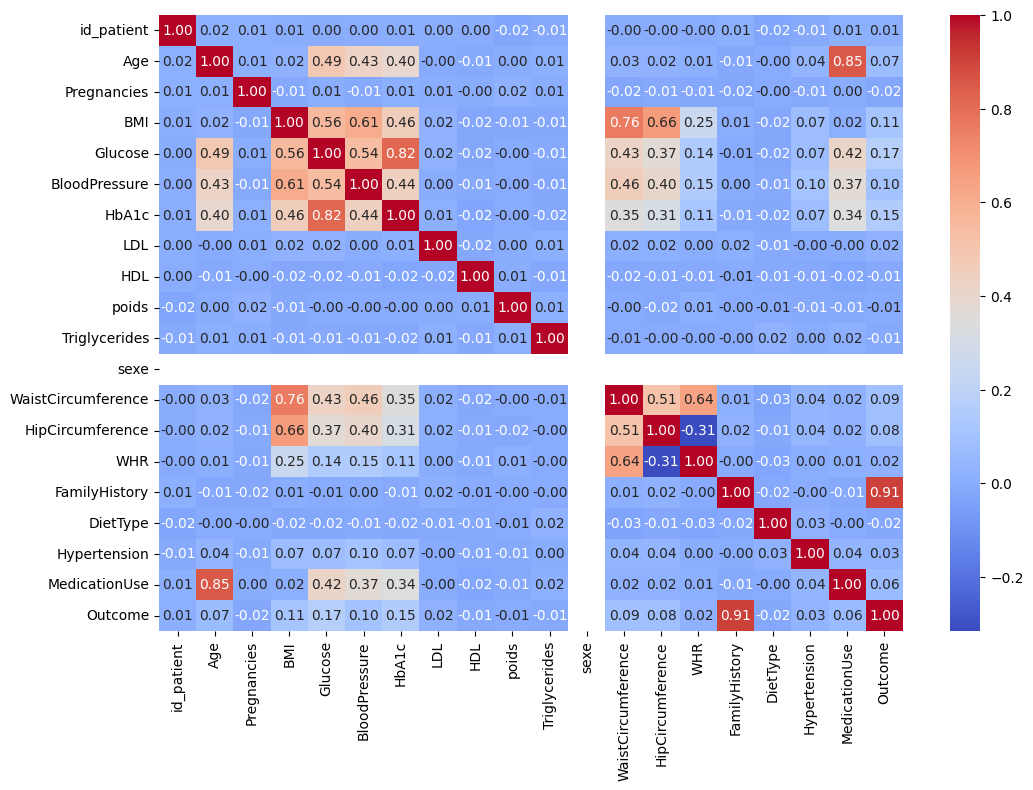

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset
df = pd.read_csv('diabetes_dataset_pfe1(in).csv', sep=';')

# Afficher les premières lignes
print(df.head())

# Afficher des informations sur le DataFrame
print(df.info())

# Liste des variables continues
variables_continues = ['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 
                       'HbA1c', 'LDL', 'HDL', 'poids', 'Triglycerides', 
                       'WaistCircumference', 'HipCircumference']

# Créer des histogrammes pour chaque variable continue
for var in variables_continues:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=var, hue='Outcome', multiple='stack', bins=30, kde=True)
    plt.title(f'Histogramme de {var} par rapport au résultat du diabète')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.legend(title='Diabète', labels=['Non (0)', 'Oui (1)'])
    plt.show()

plt.scatter(df['BMI'], df['Glucose'], alpha=0.5)
plt.title('Relation entre le BMI et le Glucose')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()

df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Proportion de Patients avec/ sans Diabète')
plt.xticks(ticks=[0, 1], labels=['Pas de Diabète', 'Diabète'], rotation=0)
plt.ylabel('Nombre de Patients')
plt.show()

# Statistiques descriptives
statistiques = df.describe(include='all')  # include='all' pour inclure les variables catégorielles
print(statistiques)

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# Dictionnaire pour stocker les valeurs aberrantes
outliers_z_dict = {}

# Détection des valeurs aberrantes avec Z-score pour chaque variable
for var in variables_continues:
    z_scores = stats.zscore(df[var])
    outliers_z = df[(z_scores > 3) | (z_scores < -3)]
    outliers_z_dict[var] = outliers_z

# Afficher les résultats
for var, outliers in outliers_z_dict.items():
    print(f"Valeurs aberrantes détectées pour {var} avec Z-score :")
    print(outliers)
    
# Compter les valeurs manquantes par colonne
valeurs_manquantes = df.isnull().sum()

# Afficher les résultats
print("Valeurs manquantes par colonne :")
print(valeurs_manquantes[valeurs_manquantes > 0])

import pandas as pd

# Identifier les doublons
doublons = df[df.duplicated()]

# Afficher les doublons
print("Doublons détectés :")
print(doublons)

# Supprimer les doublons
data_sans_doublons =df.drop_duplicates()

# Afficher le nombre de lignes avant et après la suppression
print(f"Nombre de lignes avant suppression : {len(df)}")
print(f"Nombre de lignes après suppression : {len(data_sans_doublons)}")

from sklearn.preprocessing import MinMaxScaler
# Créer un scaler Min-Max
scaler = MinMaxScaler()

# Normaliser les variables numériques
variables_numeriques = ['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 
                        'HbA1c', 'LDL', 'HDL', 'poids', 'Triglycerides', 
                        'WaistCircumference', 'HipCircumference']

data_normalise_minmax = df.copy()
data_normalise_minmax[variables_numeriques] = scaler.fit_transform(df[variables_numeriques])

# Afficher les premières lignes du DataFrame normalisé
print(data_normalise_minmax.head())

#encoder les variables categoriques
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())

# Vérifier les types de données
print(df.dtypes)

# Identifier les colonnes de type string
string_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Colonnes de type string :", string_columns)

# Convertir les colonnes de type string en float
for column in string_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Vérifier les types de données après conversion
print(df.dtypes)


# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Visualiser la matrice de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


